Documentation of `flexitext` https://github.com/tomicapretto/flexitext 

a neat library that allows you to write text in a markup language to be rendered in matplotlib figures

In [1]:
%config IPCompleter.use_jedi = False
%pdb off
%load_ext autoreload
%autoreload 3
import matplotlib
import matplotlib.pyplot as plt
from flexitext import flexitext
import PIL
from PIL import Image, ImageDraw, ImageFont
from pyphocorehelpers.assertion_helpers import Assert
# Using importlib.resources instead of pkg_resources
import importlib.resources as resources
from pathlib import Path
from pyphocorehelpers.image_helpers import ImageHelpers

# For Python 3.9+
# template_path = resources.files('pyphoplacecellanalysis.Resources').joinpath('Templates')
# fonts_folder_path = resources.files('pyphoplacecellanalysis.Resources').joinpath('fonts')
# Assert.path_exists(fonts_folder_path)

# Resources\fonts\FreeMono.ttf



# def empty_image(width: int=800, height: int=600, background_color = (255, 255, 255, 0)) -> PIL.Image.Image:
# 	# Create a new empty image
#     # Parameters: mode (RGB, RGBA, etc.), size (width, height), color (default is black)

#     if len(background_color) > 3:
#         img_type: str = 'RGB'
#     else:
#         assert len(background_color) == 4, f"length of background_color should be 3 or 4, but it was: {background_color}"
#         img_type: str = 'RGBA'
        
#     # Create a white background image
#     # width, height = 800, 600
#     # background_color = (255, 255, 255)  # White in RGB
#     # img = Image.new('RGB', (width, height), background_color)

#     # Create a transparent image (with alpha channel)
#     # transparent_img = Image.new('RGBA', (width, height), (255, 255, 255, 0))  # Transparent white
#     return Image.new(img_type, (width, height), background_color)



Automatic pdb calling has been turned OFF


In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
fig.subplots_adjust(top=0.8, left=0.025)

x = [1, 2, 3]
y_blue = [2, 2.7, 4.5]
y_red = [1, 3, 2.5]


ax.scatter(x, y_blue, color="royalblue", s=120)
ax.scatter(x, y_red, color="crimson", s=120)

# Add flexitext
text = (
    "<name:Montserrat><size:24>A <weight:bold>great chart</> showing</>\n"
    "<size:18>the values for the "
    "<color:royalblue, weight:bold>blues</> and the <color:crimson, weight:bold>reds</></></>"
)
flexitext(0.025, 0.8, text, va="bottom", xycoords="figure fraction");

In [ ]:
text = (
    "<size:28, color:blueviolet, name:Montserrat>You can write using\n</>"
    "<color:grey, size:24>multiple formats,\nand linebreaks\n\n"
    "<color:royalblue, name:Montserrat>also <weight:bold>bold text\n\n</></>"
    "<name:Montserrat>and why not <color:royalblue, style:italic>italics</> too</></>"
)

fig, ax = plt.subplots(figsize=(9, 6))
flexitext(0.5, 0.5, text, ha="center", ma="center");

In [ ]:
# Add flexitext
text = (
    "<name:Montserrat><size:24>A <weight:bold>great chart</> showing</>\n"
    "<size:18>the values for the "
    "<color:royalblue, weight:bold>blues</> and the <color:crimson, weight:bold>reds</></></>"
)
flexitext(0.025, 0.8, text, va="bottom", xycoords="figure fraction");

# Example: Draw Partial Opacity Text

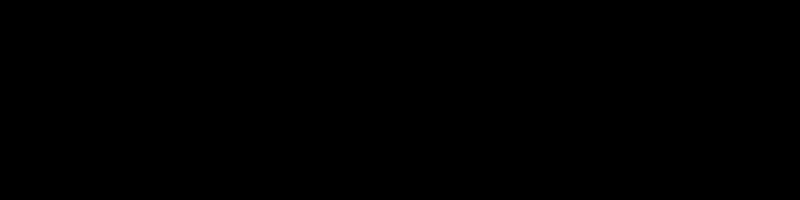

In [14]:
from PIL import Image, ImageDraw, ImageFont

# empty_image = ImageHelpers.empty_image(width=800, height=200)
empty_image = ImageHelpers.empty_image(width=800, height=200, background_color=(0, 0, 0, 255))
empty_image


In [15]:
# Using importlib.resources instead of pkg_resources
import importlib.resources as resources
from pathlib import Path

fonts_folder_path: Path = ImageHelpers.get_font_path()
Assert.path_exists(fonts_folder_path)

a_font_path: Path = ImageHelpers.get_font_path('FreeMono.ttf')
Assert.path_exists(a_font_path)
a_font_path
# Resources\fonts\FreeMono.ttf


WindowsPath('C:/Users/pho/repos/Spike3DWorkEnv/pyPhoCoreHelpers/src/pyphocorehelpers/Resources/fonts/FreeMono.ttf')

In [16]:

# get a font
fnt = ImageHelpers.get_font('FreeMono.ttf', size=88)
fnt

## OUTPUTS: a_font_path


In [17]:
from copy import deepcopy

## INPUTS: a_font_path
base = deepcopy(empty_image)
base
type(base)


PIL.Image.Image

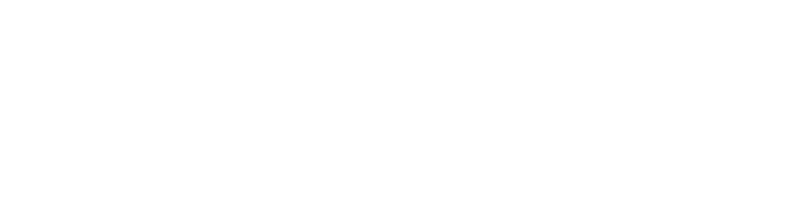

In [18]:
# get an image
# with Image.open("Pillow/Tests/images/hopper.png").convert("RGBA") as base:

# make a blank image for the text, initialized to transparent text color
txt = Image.new("RGBA", base.size, (255, 255, 255, 0))

# get a font
fnt = ImageHelpers.get_font('FreeMono.ttf', size=88)
# fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf", 40)
# get a drawing context
d = ImageDraw.Draw(txt)

# draw text, half opacity
d.text((10, 10), "Hello", font=fnt, fill=(255, 255, 255, 128))
# draw text, full opacity
d.text((10, 60), "World", font=fnt, fill=(255, 255, 255, 255))

txt


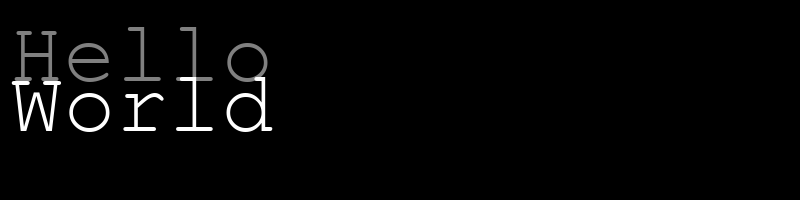

In [19]:
# First, ensure both images are in RGBA mode
if base.mode != 'RGBA':
    base = base.convert('RGBA')
    
if txt.mode != 'RGBA':
    txt = txt.convert('RGBA')

out = Image.alpha_composite(base, txt)

out #.show()

# Example: Draw Multiline Text

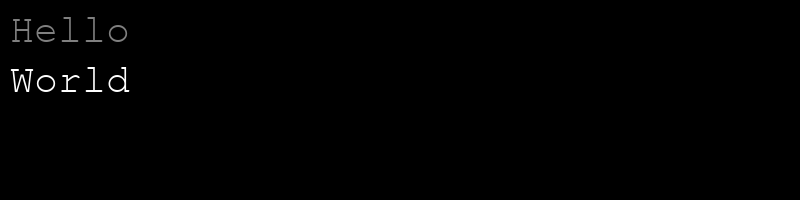

In [20]:
from PIL import Image, ImageDraw, ImageFont

# get an image
# with Image.open("Pillow/Tests/images/hopper.png").convert("RGBA") as base:

# make a blank image for the text, initialized to transparent text color
txt = Image.new("RGBA", base.size, (255, 255, 255, 0))

# get a font
fnt = ImageHelpers.get_font('FreeMono.ttf', size=40)
# get a drawing context
d = ImageDraw.Draw(txt)

# draw text, half opacity
d.text((10, 10), "Hello", font=fnt, fill=(255, 255, 255, 128))
# draw text, full opacity
d.text((10, 60), "World", font=fnt, fill=(255, 255, 255, 255))

# First, ensure both images are in RGBA mode
if base.mode != 'RGBA':
    base = base.convert('RGBA')
    
if txt.mode != 'RGBA':
    txt = txt.convert('RGBA')

out = Image.alpha_composite(base, txt)

out
# out.show()